# 1.4. Support Vector Machines
  
Support vector machines (SVMs) are a set of supervised learning methods **used for classification, regression and outliers detection**.  
  
The **advantages** of support vector machines are:  
  
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.
  
The **disadvantages** of support vector machines include:  
  
- If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
- SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation (see Scores and probabilities, below).
  
The support vector machines in scikit-learn support both dense (`numpy.ndarray` and convertible to that by `numpy.asarray`) and sparse (any `scipy.sparse`) sample vectors as input. However, to use an SVM to make predictions for sparse data, it must have been fit on such data. For optimal performance, use C-ordered `numpy.ndarray` (dense) or `scipy.sparse.csr_matrix` (sparse) with `dtype=float64`.  

## 1.4.1. Classification
  
>`sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)`  
  
>`sklearn.svm.NuSVC(nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)`
  
  
>`sklearn.svm.NuSVC(nu=0.5, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)`  
  
**`SVC`, `NuSVC` and `LinearSVC` are classes capable of performing multi-class classification on a dataset.**  
  
`SVC` and `NuSVC` are similar methods, but accept slightly different sets of parameters and have different mathematical formulations (see section Mathematical formulation). On the other hand, LinearSVC is another implementation of Support Vector Classification for the case of a linear kernel. Note that LinearSVC does not accept keyword `kernel`, as this is assumed to be linear. It also lacks some of the members of SVC and NuSVC, like `support_`.  
  
As other classifiers, SVC, NuSVC and LinearSVC take as input two arrays: an array X of size `[n_samples, n_features]` holding the training samples, and an array y of class labels (strings or integers), size `[n_samples]`:  
  

In [1]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

After being fitted, the model can then be used to predict new values:

In [2]:
clf.predict([[2.0, 2.0]])

array([1])

SVMs decision function depends on some subset of the training data, called the support vectors. Some properties of these support vectors can be found in members `support_vectors_`, `support_` and `n_support`:

In [3]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [4]:
# get indices of support vectors
clf.support_

array([0, 1], dtype=int32)

In [5]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

### Plot different SVM classifiers in the iris dataset
  
Comparison of different linear SVM classifiers on a 2D projection of the iris dataset. We only consider the first 2 features of this dataset:
  
- Sepal length
- Sepal width
  
This example shows how to plot the decision surface for four SVM classifiers with different kernels.  
  
The linear models `LinearSVC()` and `SVC(kernel='linear')` yield slightly different decision boundaries. This can be a consequence of the following differences:  
  
- `LinearSVC` minimizes the squared hinge loss while SVC minimizes the regular hinge loss.
- `LinearSVC` uses the One-vs-All (also known as One-vs-Rest) multiclass reduction while SVC uses the One-vs-One multiclass reduction.
  
Both linear models have linear decision boundaries (intersecting hyperplanes) while the non-linear kernel models (polynomial or Gaussian RBF) have more flexible non-linear decision boundaries with shapes that depend on the kind of kernel and its parameters.  
  
#### Note
  
while plotting the decision function of classifiers for toy 2D datasets can help get an intuitive understanding of their respective expressive power, be aware that those intuitions don’t always generalize to more realistic high-dimensional problems. 

Automatically created module for IPython interactive environment


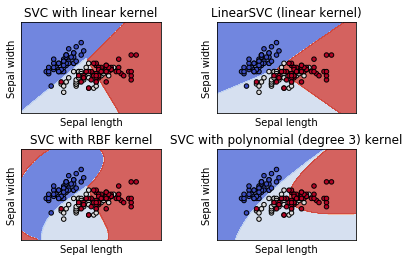

In [6]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### 1.4.1.1. Multi-class classification
  
**`SVC` and `NuSVC` implement the “one-against-one” approach** (Knerr et al., 1990) for multi- class classification. **If `n_class is` the number of classes, then `n_class * (n_class - 1) / 2` classifiers are constructed and each one trains data from two classes.** To provide a consistent interface with other classifiers, the `decision_function_shape` option allows to aggregate the results of the “one-against-one” classifiers to a decision function of shape `(n_samples, n_classes)`:  

In [7]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

6

In [9]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

**On the other hand, LinearSVC implements “one-vs-the-rest” multi-class strategy, thus training n_class models**. If there are only two classes, only one model is trained:

In [10]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [11]:
dec = lin_clf.decision_function([[1]])
dec.shape[1]

4

**Note that the LinearSVC also implements an alternative multi-class strategy, the so-called multi-class SVM formulated by Crammer and Singer, by using the option `multi_class='crammer_singer'`.** This method is consistent, which is not true for one-vs-rest classification. **In practice, one-vs-rest classification is usually preferred, since the results are mostly similar, but the runtime is significantly less.**

For “one-vs-rest” LinearSVC the attributes `coef_` and `intercept_` have the shape `[n_class, n_features]` and `[n_class]` respectively. Each row of the coefficients corresponds to one of the `n_class` many “one-vs-rest” classifiers and similar for the intercepts, in the order of the “one” class.

In the case of “one-vs-one” SVC, the layout of the attributes is a little more involved. In the case of having a linear kernel, The layout of `coef_` and `intercept_` is similar to the one described for LinearSVC described above, except that the shape of `coef_` is `[n_class * (n_class - 1) / 2, n_features]`, corresponding to as many binary classifiers. The order for classes 0 to n is “0 vs 1”, “0 vs 2” , … “0 vs n”, “1 vs 2”, “1 vs 3”, “1 vs n”, . . . “n-1 vs n”.

The shape of `dual_coef_` is `[n_class-1, n_SV]` with a somewhat hard to grasp layout. The columns correspond to the support vectors involved in any of the `n_class * (n_class - 1) / 2` “one-vs-one” classifiers. Each of the support vectors is used in `n_class - 1` classifiers. The `n_class - 1` entries in each row correspond to the dual coefficients for these classifiers.

This might be made more clear by an example:

Consider a three class problem with class 0 having three support vectors $v^{0}_0$, $v^{1}_0$, $v^{2}_0$ and class 1 and 2 having two support vectors $v^{0}_1$, $v^{1}_1$ and $v^{0}_2$, $v^{1}_2$ respectively. For each support vector $v^{j}_i$, there are two dual coefficients. Let’s call the coefficient of support vector $v^{j}_i$ in the classifier between classes $i$ and $k$ $\alpha^{j}_{i,k}$. Then `dual_coef_` looks like this:  


|coefficient1|coefficient2|which class|
|---|---|---|
|$\alpha^{0}_{0,1}$|$\alpha^{0}_{0,2}$|Coefficients for SVs of class **0**
|$\alpha^{1}_{0,1}$|$\alpha^{1}_{0,2}$|Coefficients for SVs of class **0**
|$\alpha^{2}_{0,1}$|$\alpha^{2}_{0,2}$|Coefficients for SVs of class **0**
|$\alpha^{0}_{1,0}$|$\alpha^{0}_{1,2}$|Coefficients for SVs of class **1**
|$\alpha^{1}_{1,0}$|$\alpha^{1}_{1,2}$|Coefficients for SVs of class **1**
|$\alpha^{0}_{2,0}$|$\alpha^{0}_{2,1}$|Coefficients for SVs of class **2**
|$\alpha^{1}_{2,0}$|$\alpha^{1}_{2,1}$|Coefficients for SVs of class **2**


### 1.4.1.2. Scores and probabilities
  
**The SVC method `decision_function` gives per-class scores for each sample (or a single score per sample in the binary case).** When the constructor option `probability` is set to `True`, class membership probability estimates (from the methods `predict_proba` and `predict_log_proba`) are enabled. In the binary case, the probabilities are calibrated using *Platt scaling*: logistic regression on the SVM’s scores, fit by an additional cross-validation on the training data. In the multiclass case, this is extended as per Wu et al. (2004).  
  
**Needless to say, the cross-validation involved in Platt scaling is an expensive operation for large datasets.** In addition, the probability estimates may be inconsistent with the scores, in the sense that the “argmax” of the scores may not be the argmax of the probabilities. (E.g., in binary classification, a sample may be labeled by `predict` as belonging to a class that has probability <½ according to `predict_proba`.) **Platt’s method is also known to have theoretical issues. If confidence scores are required, but these do not have to be probabilities, then it is advisable to set `probability=False` and use `decision_function` instead of `predict_proba`.**    
  
#### Platt scaling
  
>In machine learning, Platt scaling or Platt calibration is a way of transforming the outputs of a classification model into a probability distribution over classes. The method was invented by John Platt in the context of support vector machines...   
[by Wikipedia](https://en.wikipedia.org/wiki/Platt_scaling)  

### 1.4.1.3. Unbalanced problems  
  
**In problems where it is desired to give more importance to certain classes or certain individual samples keywords `class_weight` and `sample_weight` can be used.**  
  
SVC (but not NuSVC) implement a keyword `class_weight` in the `fit` method. It’s a dictionary of the form `{class_label : value}`, where value is a floating point number > 0 that sets the parameter C of class `class_label` to `C * value`.  
  
**SVC, NuSVC, SVR, NuSVR and OneClassSVM implement also weights for individual samples in method `fit` through keyword `sample_weight`.** Similar to `class_weight`, these set the parameter `C` for the i-th example to `C * sample_weight[i]`.

### SVM: Maximum margin separating hyperplane
  
Plot the maximum margin separating hyperplane within a two-class separable dataset using a Support Vector Machine classifier with linear kernel.

Automatically created module for IPython interactive environment


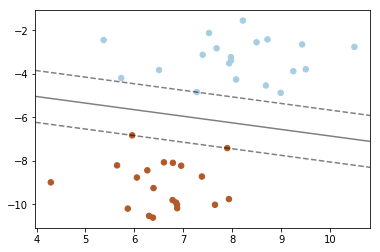

In [12]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none')
plt.show()


### SVM: Separating hyperplane for unbalanced classes
  
Find the optimal separating hyperplane using an SVC for classes that are unbalanced.  
  
We first find the separating plane with a plain SVC and then plot (dashed) the separating hyperplane with automatically correction for unbalanced classes.
  
#### Note  
  
This example will also work by replacing `SVC(kernel="linear")` with `SGDClassifier(loss="hinge")`. Setting the loss parameter of the `SGDClassifier` equal to hinge will yield behaviour such as that of a `SVC` with a linear kernel.  
  
For example try instead of the SVC:  
  
`clf = SGDClassifier(n_iter=100, alpha=0.01)`    

No handles with labels found to put in legend.


Automatically created module for IPython interactive environment


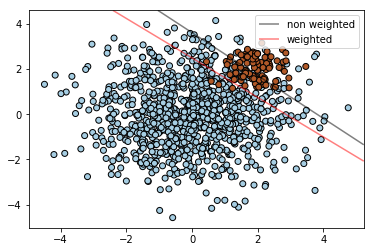

In [13]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create clusters with 1000 and 100 points
rng = np.random.RandomState(0)
n_samples_1 = 1000
n_samples_2 = 100
X = np.r_[1.5 * rng.randn(n_samples_1, 2),
          0.5 * rng.randn(n_samples_2, 2) + [2, 2]]
y = [0] * (n_samples_1) + [1] * (n_samples_2)

# fit the model and get the separating hyperplane
clf = svm.SVC(kernel='linear', C=1.0)
clf.fit(X, y)

# fit the model and get the separating hyperplane using weighted classes
wclf = svm.SVC(kernel='linear', class_weight={1: 10})
wclf.fit(X, y)

# plot separating hyperplanes and samples
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.legend()

# plot the decision functions for both classifiers
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
Z = wclf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

plt.legend([a.collections[0], b.collections[0]], ["non weighted", "weighted"],
           loc="upper right")
plt.show()

### Non-linear SVM

Perform binary classification using non-linear SVC with RBF kernel. The target to predict is a XOR of the inputs.

The color map illustrates the decision function learned by the SVC.

Automatically created module for IPython interactive environment


/home/tk/.local/lib/python3.5/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


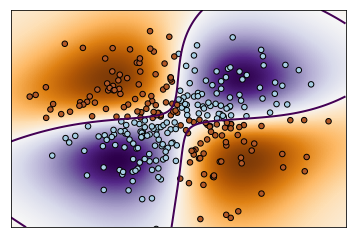

In [14]:
%matplotlib inline
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

## 1.4.2. Regression
  
>`sklearn.svm.SVR(kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)`  
  
>`sklearn.svm.NuSVR(nu=0.5, C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, tol=0.001, cache_size=200, verbose=False, max_iter=-1)`  
  
>`sklearn.svm.LinearSVR(epsilon=0.0, tol=0.0001, C=1.0, loss=’epsilon_insensitive’, fit_intercept=True, intercept_scaling=1.0, dual=True, verbose=0, random_state=None, max_iter=1000)`  
  
**The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression.**  
  
The model produced by support vector classification (as described above) **depends only on a subset of the training data**, because the cost function for building the model does not care about training points that lie beyond the margin. Analogously, the model produced by Support Vector Regression depends only on a subset of the training data, because the cost function for building the model ignores any training data close to the model prediction.  
  
There are three different implementations of Support Vector Regression: SVR, NuSVR and LinearSVR. **LinearSVR provides a faster implementation than SVR but only considers linear kernels, while NuSVR implements a slightly different formulation than SVR and LinearSVR.** See Implementation details for further details.  
  
As with classification classes, the fit method will take as argument vectors X, y, only that in this case y is expected to have floating point values instead of integer values:  
  

In [15]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = svm.SVR()
clf.fit(X, y) 

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
clf.predict([[1, 1]])

array([1.5])

### Support Vector Regression (SVR) using linear and non-linear kernels
  
Toy example of 1D regression using linear, polynomial and RBF kernels.

Automatically created module for IPython interactive environment


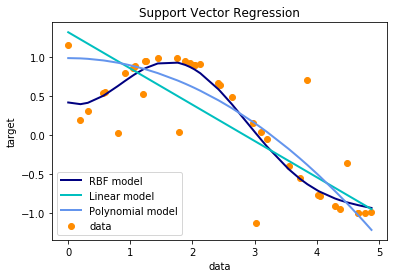

In [17]:
%matplotlib inline
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

## 1.4.3 Density estimation, novelty detection
  
>`sklearn.svm.OneClassSVM(kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, tol=0.001, nu=0.5, shrinking=True, cache_size=200, verbose=False, max_iter=-1, random_state=None)`  
  
>Novelty detection is the identification of new or unknown data or signal that a machine learning system is not aware of during training.
  
One-class SVM is used for novelty detection. The class that implements this is called OneClassSVM.  
  
In this case, as it is a type of unsupervised learning, the fit method will only take as input an array X, as there are no class labels.  
  
See, *section 2.7 Novelty and Outlier Detection* for more details on this usage.  
  
- [One Class SVM を使った外れ値検知](https://qiita.com/yhyhyhjp/items/88006646179adf68cb95)  
- [異常検知のための One Class SVM](https://qiita.com/kznx/items/434d98bf1a0e39327542)
- [One-class SVM with non-linear kernel (RBF)](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py)
- [Species distribution modeling](http://scikit-learn.org/stable/auto_examples/applications/plot_species_distribution_modeling.html#sphx-glr-auto-examples-applications-plot-species-distribution-modeling-py)

## 1.4.4 Complexity
  
Support Vector Machines are powerful tools, but their compute and storage requirements increase rapidly with the number of training vectors. The core of an SVM is a quadratic programming problem (QP), separating support vectors from the rest of the training data.  
  
Also note that for the linear case, the algorithm used in LinearSVC by the liblinear implementation is much more efficient than its libsvm-based SVC counterpart and can scale almost linearly to millions of samples and/or features.  

## 1.4.5. Tips on Practical Use
  
  


- Avoiding data copy: For SVC, SVR, NuSVC and NuSVR, if the data passed to certain methods is not C-ordered contiguous, and double precision, it will be copied before calling the underlying C implementation. You can check whether a given numpy array is C-contiguous by inspecting its `flags` attribute.
  
  For LinearSVC (and LogisticRegression) any input passed as a numpy array will be copied and converted to the liblinear internal sparse data representation (double precision floats and int32 indices of non-zero components). If you want to fit a large-scale linear classifier without copying a dense numpy C-contiguous double precision array as input we suggest to use the SGDClassifier class instead. The objective function can be configured to be almost the same as the LinearSVC model.
  
  
- Kernel cache size: **For SVC, SVR, nuSVC and NuSVR, the size of the kernel cache has a strong impact on run times for larger problems.** If you have enough RAM available, **it is recommended to set `cache_size` to a higher value than the default of 200(MB), such as 500(MB) or 1000(MB).**
  
  
- Setting C: **`C` is `1` by default and it’s a reasonable default choice. If you have a lot of noisy observations you should decrease it. It corresponds to regularize more the estimation.**
  
  
- **Support Vector Machine algorithms are not scale invariant, so it is highly recommended to scale your data.** For example, scale each attribute on the input vector X to [0,1] or [-1,+1], or standardize it to have mean 0 and variance 1. **Note that the same scaling must be applied to the test vector to obtain meaningful results.** See section Preprocessing data for more details on scaling and normalization.
  
  
- Parameter nu in NuSVC/OneClassSVM/NuSVR approximates the fraction of training errors and support vectors.
  
  
- In SVC, if data for classification are unbalanced (e.g. many positive and few negative), `set class_weight='balanced'` and/or try different penalty parameters C.
  
  
- The underlying LinearSVC implementation uses a random number generator to select features when fitting the model. **It is thus not uncommon, to have slightly different results for the same input data. If that happens, try with a smaller tol parameter.**
  
  
- Using L1 penalization as provided by `LinearSVC(loss='l2', penalty='l1', dual=False)` yields a sparse solution, i.e. only a subset of feature weights is different from zero and contribute to the decision function. Increasing `C` yields a more complex model (more feature are selected). The `C` value that yields a “null” model (all weights equal to zero) can be calculated using `l1_min_c`.

  

## 1.4.6. Kernel functions
  
The kernel function can be any of the following:

- linear: $\langle x, x'\rangle$.
- polynomial: $(\gamma \langle x, x'\rangle + r)^d$. $d$ is specified by keyword `degree`, $r$ by `coef0`.
- rbf: $\exp(-\gamma \|x-x'\|^2)$. $\gamma$ is specified by keyword `gamma`, must be greater than 0.
- sigmoid $(\tanh(\gamma \langle x,x'\rangle + r))$, where r is specified by `coef0`.

Different kernels are specified by keyword kernel at initialization:

In [18]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

'linear'

In [19]:

rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

### 1.4.6.1 Cosutom Kernels
  
 You can define your own kernels by either giving the kernel as a python function or by precomputing the Gram matrix.

For more info: [1.4.6.1. Custom Kernels](http://scikit-learn.org/stable/modules/svm.html#custom-kernels)

## 1.4.7. Mathematical formulation
  
A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.
  
For more info: [1.4.7. Mathematical formulation](http://scikit-learn.org/stable/modules/svm.html#mathematical-formulation)